In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

data=pd.read_csv("./data/oscar_age_cleaned.csv").reset_index(drop=True)

### information a trouver : 
    qui a obtenu le plus d'oscars ?
    âge moyen par genre,
    évolution de l'age moyen par décennie, avec histogramme et régression linéaire
    corrélation entre genre et âge
    qui des hommes ou des femmes a le plus tendance à être multi-oscarisé ?
    y a-t-il plus de multi-oscarisés par décennie ?

qui a obtenu le plus d'oscars ?

In [5]:
# plus d'oscarisation par genre 
def most_oscarised(genre) : 
    nom=data[data['gender'] == genre].groupby('name').agg('count').sort_values('gender',ascending=False)[:1]
    result='categorie: '+genre+" => "+nom.index.to_list()[0]+' a eu '+str(nom['movie'].to_list()[0])+' oscar'
    return result

print(most_oscarised('M'),most_oscarised('F'),sep='\n')

categorie: M => Daniel Day-Lewis a eu 3 oscar
categorie: F => Katharine Hepburn a eu 4 oscar


âge moyen par genre

In [12]:
def age_moyen (genre): return 'age moyen '+genre+" => "+str(data[data['gender'] == genre]['age'].mean())+' an'

print(age_moyen('M'),age_moyen('F'),sep='\n')

age moyen M => 44.552083333333336 an
age moyen F => 37.125 an


évolution de l'age moyen par décennie, avec histogramme et régression linéaire

In [20]:
def everage_age_decade (genre):

    couleur = 'blue' if genre =='M' else 'red'

    df=data[data['gender']==genre].copy()
    df['year']=(df['year']//10)*10

    X = df.groupby(['year'])['year'].agg('mean').values.reshape(-1,1)
    Y = df.groupby(['year'])['age'].agg('mean').values.reshape(-1,1)

    Y_pred = LinearRegression().fit(X, Y).predict(X)

    plt.scatter(X, Y, color=couleur,label='femme')

    plt.plot(X, Y_pred, color=couleur, linewidth=1,label='femme')





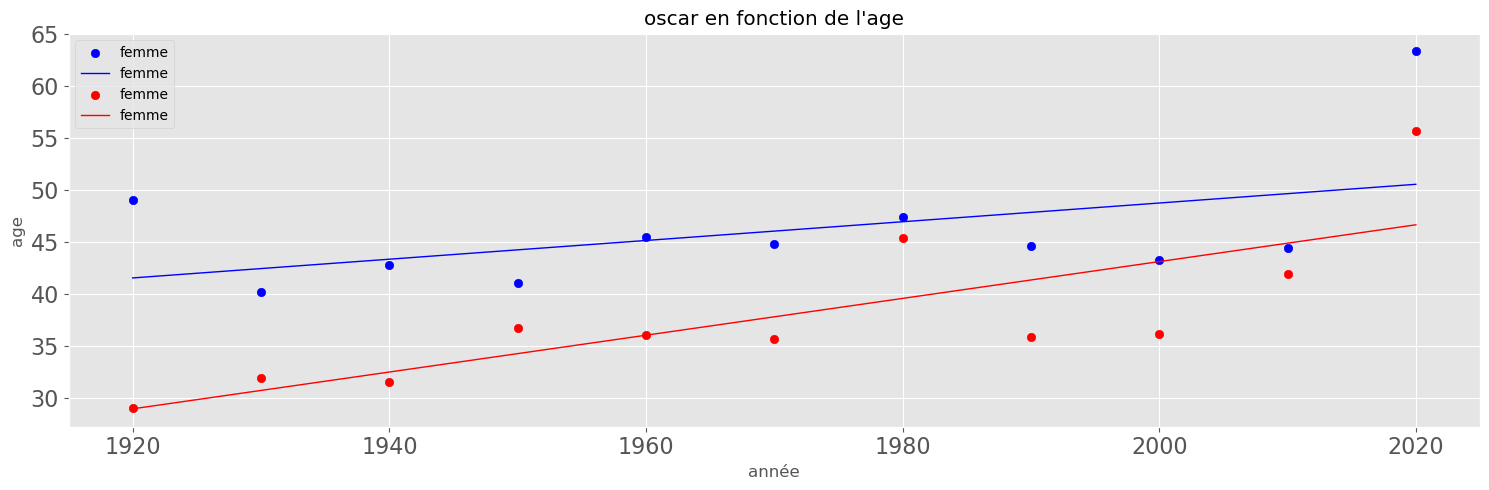

In [21]:
# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] =16

plt.figure()

everage_age_decade ('M')
everage_age_decade ('F')

plt.xlabel('année')
plt.ylabel('age')
plt.title('oscar en fonction de l\'age')
plt.legend()

plt.tight_layout()
plt.show()

Au vue des données precedentes les homme remporte  visiblement les oscars plus tard que les femmes , même si la difference a l'air de se réduire au fil du temps.

Qui des hommes ou des femmes a le plus tendance à être multi-oscarisé ?

In [55]:
df= data[data['movie'].str.contains(',')]
print(str(len(df[df['gender']=='M']))+' male rececieve multiple oscar')
print(str(len(df[df['gender']=='F']))+' female rececieve multiple oscar')
df

2 male rececieve multiple oscar
3 female rececieve multiple oscar


,year,age,name,movie,gender
0,1927,44,Emil Jannings,"The Last Command, The Way of All Flesh",M
1,1927,22,Janet Gaynor,"Seventh Heaven, Street Angel and Sunrise: A So...",F
25,1939,34,Robert Donat,"Goodbye, Mr. Chips",M
49,1951,54,Shirley Booth,"Come Back, Little Sheba",F
181,2017,60,Frances McDormand,"Three Billboards Outside Ebbing, Missouri",F



Y a-t-il plus de multi-oscarisés par décennie ?

In [80]:
data['oscar']=data['movie'].apply(lambda x : len(x.split(','))-1 )
data

,year,age,name,movie,gender,oscar
0,1927,44,Emil Jannings,"The Last Command, The Way of All Flesh",M,1
1,1927,22,Janet Gaynor,"Seventh Heaven, Street Angel and Sunrise: A So...",F,1
2,1928,37,Mary Pickford,Coquette,F,0
3,1928,41,Warner Baxter,In Old Arizona,M,0
4,1929,28,Norma Shearer,The Divorcee,F,0
...,...,...,...,...,...,...
187,2020,83,Anthony Hopkins,The Father,M,0
188,2021,44,Jessica Chastain,The Eyes of Tammy Faye,F,0
189,2021,53,Will Smith,King Richard,M,0
190,2022,54,Brendan Fraser,The Whale,M,0


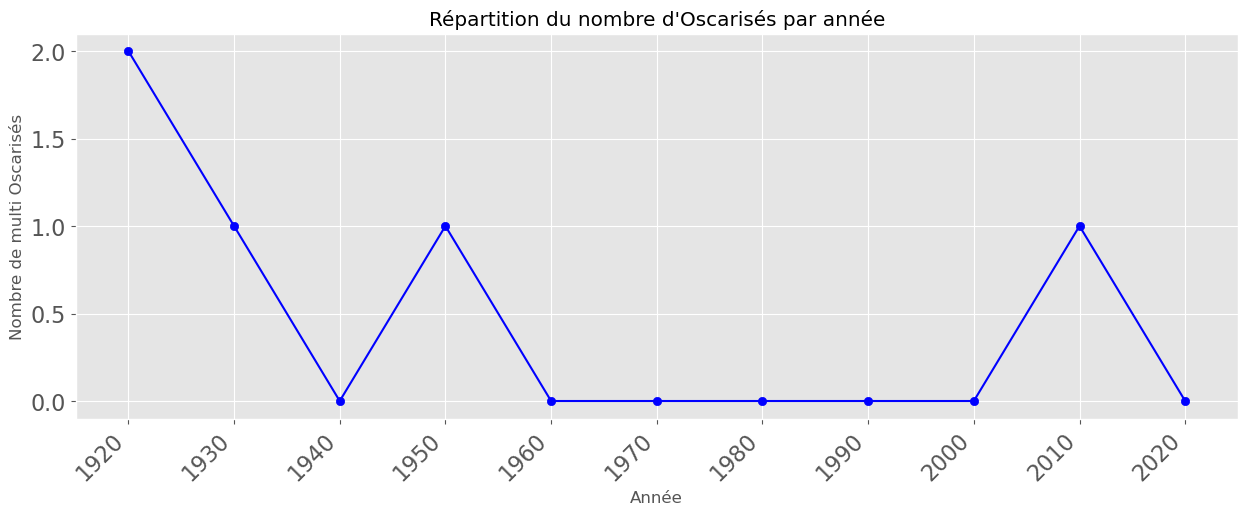

In [107]:
import numpy as np

def many_oscarised_by_year():

    plt.figure()

    df=data.copy()

    #regroupement par tranche de 10 ans  
    df['year']=(df['year']//10)*10

    df = df.groupby('year').agg('sum').reset_index()  
    x=df['year']
    y=df['oscar']

    plt.plot(x,y, color='blue')
    plt.scatter(x,y, color='blue')
    plt.xticks(np.arange(min(x), max(x)+1, 10), rotation=45, ha='right')
   
    plt.title("Répartition du nombre d'Oscarisés par année")
    plt.xlabel("Année")
    plt.ylabel("Nombre de multi Oscarisés")
    plt.show()



many_oscarised_by_year()


les données ne permettents pas d'observer une tendance 